In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('data_processed_label_encoded.csv')

In [4]:
data.shape

(7040, 25)

In [5]:
data.head()

,CountryCode,Year,AIR_TRANS_FREIGHT,ALT_NUCL_EN_PERC,CEREAL_YIELD,CO2_EM_PC,CO2_EM_TOTAL,COMB_REN_WASTE_PERC,ELEC_PROD_COAL_PERC,ELEC_PROD_HYDRO_PERC,...,FOSSIL_FUEL_EN_CONS_PERC,FUEL_IMPORT_PERC,GDP_GROWTH_PERC,GDP_PC,METHANE_EM,NO2_EM,POP_GROWTH_PERC,POP_URBAN_AGG,URBAN_POP_GROWTH,URBAN_POP_TOTAL
0,0.0,1971.0,179.560502,1.351166,805.7,0.564548,3410.310,82.814638,0.0,81.536388,...,15.834196,3.008041,3.897323,2133.368871,14500.0,15844.224,2.521468,8.088198,6.935496,15.632
1,0.0,1972.0,179.560502,1.410646,780.3,0.721246,4506.743,77.328549,0.0,81.145585,...,21.260806,4.912853,3.897323,2133.368871,15590.0,16758.848,3.381711,8.226706,8.512645,16.455
2,0.0,1973.0,179.560502,1.694730,764.0,0.751240,4880.777,78.198305,0.0,82.723577,...,20.106941,5.225642,3.897323,2133.368871,16651.7,17638.938,3.898493,8.323290,8.964003,17.310
3,0.0,1974.0,179.560502,1.748593,712.6,0.720776,4873.443,77.325302,0.0,69.812856,...,20.926104,4.493266,3.897323,2133.368871,15008.3,14997.738,3.989233,8.413978,9.013923,18.202
4,0.0,1975.0,179.560502,1.982570,773.9,0.628569,4415.068,80.191191,0.0,72.796935,...,17.826264,11.942561,3.897323,2133.368871,17061.4,17645.913,3.810585,8.520843,8.772812,19.128


In [127]:
data_usa = data.loc[(data['CountryCode'] == 153)]
data_usa.tail()

,CountryCode,Year,AIR_TRANS_FREIGHT,ALT_NUCL_EN_PERC,CEREAL_YIELD,CO2_EM_PC,CO2_EM_TOTAL,COMB_REN_WASTE_PERC,ELEC_PROD_COAL_PERC,ELEC_PROD_HYDRO_PERC,...,FOSSIL_FUEL_EN_CONS_PERC,FUEL_IMPORT_PERC,GDP_GROWTH_PERC,GDP_PC,METHANE_EM,NO2_EM,POP_GROWTH_PERC,POP_URBAN_AGG,URBAN_POP_GROWTH,URBAN_POP_TOTAL
6771,153.0,2010.0,1.216190,6.550348,3576.0,6.693450,190361.304,1.054280,0.0,67.490001,...,89.812497,0.626019,-1.488791,13825.358088,57057.700,15819.734000,1.448313,30.035499,1.477832,88.083
6772,153.0,2011.0,7.561770,7.704321,3461.1,5.931888,171362.577,1.121703,0.0,70.930223,...,88.126095,0.769236,4.176425,10955.349913,57628.277,15977.931340,1.564456,29.885242,1.592835,88.108
6773,153.0,2012.0,5.672041,6.972635,3760.2,6.540353,192040.790,1.020756,0.0,67.411408,...,89.258569,0.892059,5.625957,12985.505325,58198.854,16136.128680,1.627756,29.728321,1.644780,88.123
6774,153.0,2013.0,5.198784,8.247059,4007.3,6.176024,183944.054,1.073811,0.0,67.834524,...,88.377973,0.584178,1.343094,12456.712454,29056.750,12683.649014,1.424032,29.636198,1.435380,88.133
6775,153.0,2014.0,4.068351,2.401774,4040.7,6.161192,185113.827,11.186967,0.0,68.262704,...,75.558918,11.942561,-3.894386,16054.490513,29056.750,12683.649014,0.874378,29.709194,0.886858,88.144


<AxesSubplot:xlabel='Year'>

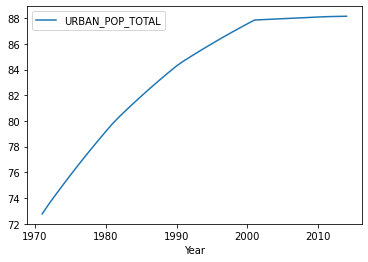

In [129]:
data_usa.plot(kind='line',x='Year',y='URBAN_POP_TOTAL')

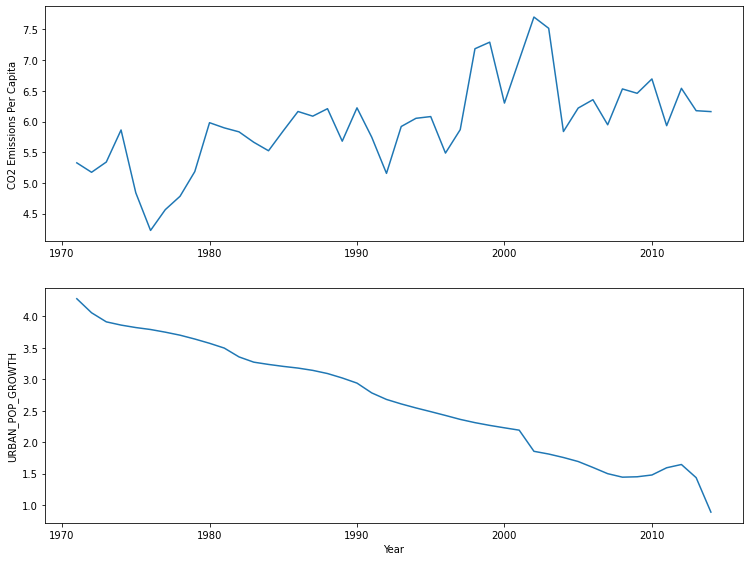

In [128]:
fig = plt.figure()
fig.set_size_inches(12.5, 9.5)

plt.subplot(2, 1, 1)
plt.plot(data_usa['Year'],data_usa['CO2_EM_PC'])
plt.ylabel('CO2 Emissions Per Capita')

plt.subplot(2, 1, 2)
plt.plot(data_usa['Year'],data_usa['URBAN_POP_GROWTH'])
plt.ylabel("URBAN_POP_GROWTH")
plt.xlabel('Year')

plt.show()

In [59]:
selected_data = data_usa

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [130]:
X_train,X_test,y_train,y_test = train_test_split(selected_data['Year'].values.reshape(-1, 1),selected_data[['NO2_EM']].values,test_size= 0.2)   # split the dataset with 10% test data 

In [131]:
reg = LinearRegression()                  # start the clasifier
reg.fit(X_train,y_train)                  # fit the model

LinearRegression()

In [132]:
print('Score :' ,reg.score(X_test.reshape(-1,1),y_test))    # Accuracy score on test data

Score : 0.7483200805435719


In [133]:
x_line = np.arange(1970,2050).reshape(-1,1)                 # lining Year upto 2050
p = reg.predict(x_line).T                                   # predict the labels 

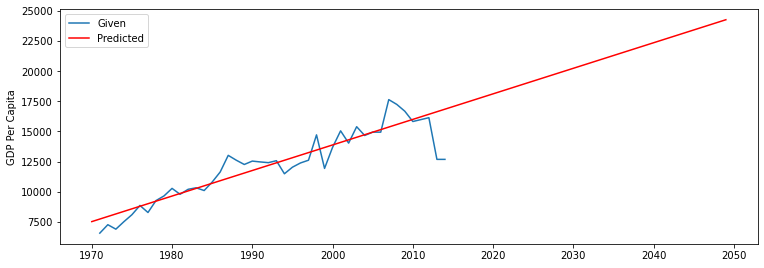

In [134]:
# 2d plots
fig = plt.figure()
fig.set_size_inches(12.5, 9.5)

plt.subplot(2, 1, 1)
plt.plot(selected_data['Year'],selected_data['NO2_EM'],label='Given')
plt.plot(x_line,p[0], color='red',label='Predicted')
plt.ylabel('GDP Per Capita')
plt.legend()


plt.show()